In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
seq_data = pd.read_csv('../output/datasets/cleavage_filtered.csv.gz')
seq_data = seq_data.groupby(['core', 'rna', 'sub_mod']).agg(FC=('FC', np.mean),
                                                                       FC_sd=('FC', np.std), 
                                                                       N=('core', np.count_nonzero))
page_data = pd.read_csv('../input/kinetics_PAGE.csv')
page_data = page_data.rename(columns={'sequence': 'core'})
page_data = page_data.groupby(['core', 'rna', 'sub_mod']).agg(FC=('FC', np.mean),
                                                                       FC_sd=('FC', np.std), 
                                                                       N=('core', np.count_nonzero))

In [3]:
joined = seq_data.join(page_data,
                       on=['core', 'sub_mod', 'rna'], how='inner',
                       lsuffix='_seq').reset_index()

In [4]:
slope, intercept, r, p, se = linregress(joined['FC'], joined['FC_seq'])

In [5]:
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r squared: {r ** 2}')
print(f'p-value: {p}')
print(f'standard error: {se}')

slope: 1.3829580219488784
intercept: -0.06322211731313765
r squared: 0.910039221967861
p-value: 1.8592159020728688e-05
standard error: 0.15373068080608446


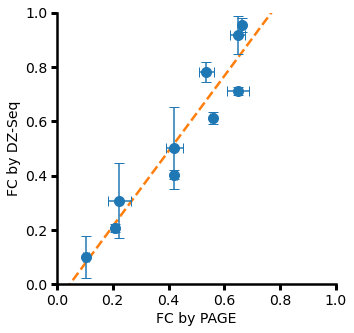

In [6]:
plt.figure(figsize=(5, 5))
plt.errorbar(x=joined['FC'],
             y=joined['FC_seq'],
             fmt='o',
             yerr=joined['FC_sd_seq'],
             xerr=joined['FC_sd'],
             ms=10,
             capsize=5)
plt.plot(np.linspace(0, 1), intercept + slope * np.linspace(0, 1),
         linestyle='--',
         linewidth=2.5,
         zorder=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FC by PAGE', fontsize=14)
plt.ylabel('FC by DZ-Seq', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().tick_params(width=3, size=6, labelsize=14)